In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
np.random.seed(0)

In [4]:
data = pd.read_csv('/content/KwhConsumptionBlower78_1.csv')
data['TxnDate'] = pd.to_datetime(data['TxnDate'])
data = data.sort_values(by='TxnDate')
data.set_index('TxnDate', inplace=True)
data.dropna(inplace=True)

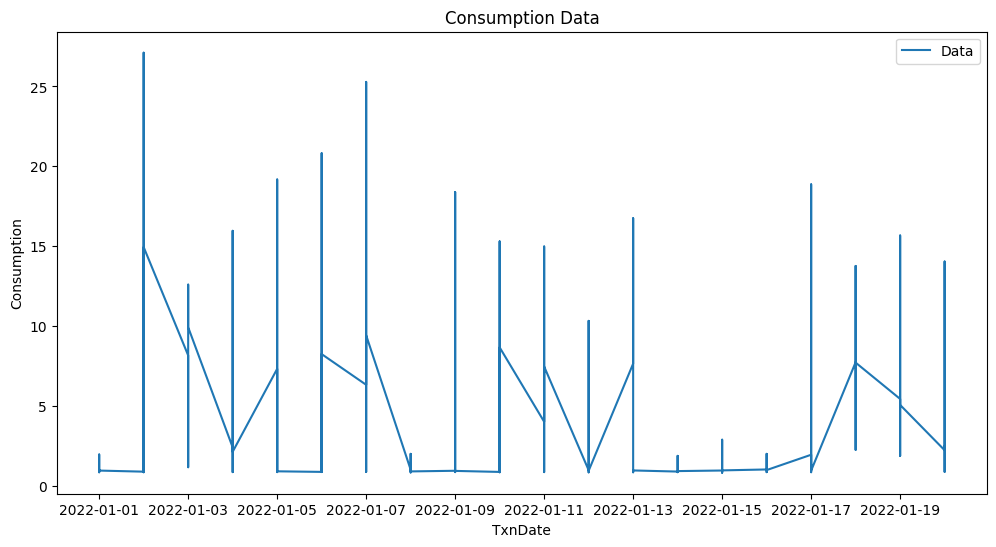

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Consumption'], label='Data')
plt.xlabel('TxnDate')
plt.ylabel('Consumption')
plt.legend()
plt.title('Consumption Data')
plt.show()

In [6]:
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]
y_train = train_data['Consumption']
y_test = test_data['Consumption']

<Figure size 1200x600 with 0 Axes>

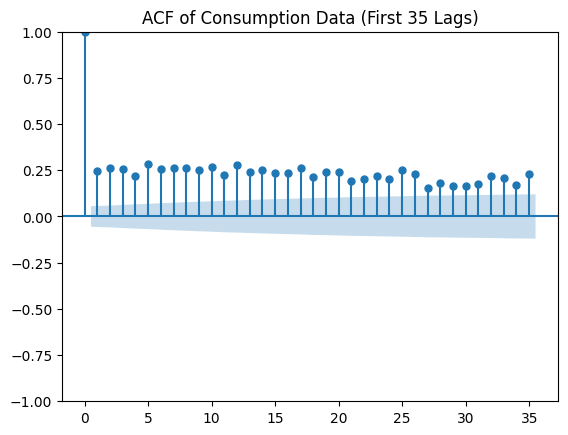

In [7]:
plt.figure(figsize=(12, 6))
plot_acf(data['Consumption'], lags=35)
plt.title('ACF of Consumption Data (First 35 Lags)')
plt.show()

In [13]:
lag_order = 1
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [15]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
variance = np.var(y_test)

In [16]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Variance_testing: {variance:.2f}')

Mean Absolute Error: 2.40
Root Mean Squared Error: 3.31
Variance_testing: 10.14
